<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_moives_boxnum_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#한글화

In [5]:
#나눔 고딕 폰트 인스톨
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 라이브러리 로드

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn')
set_matplotlib_formats('svg')



In [5]:
#맷플롯립 폰트 관련 매니저
import matplotlib.font_manager as fm
# 맷플롯라이브러리에 폰트 설정
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()
# 진행후에 런타임 다시시작
print("현재 설정 폰트",plt.rcParams['font.family'])

현재 설정 폰트 ['NanumBarunGothic']


# 데이터 불러오기

In [418]:
path  = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/movies/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")

In [34]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [35]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [37]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [38]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

#EDA

In [39]:
train.shape, test.shape

((600, 12), (243, 11))

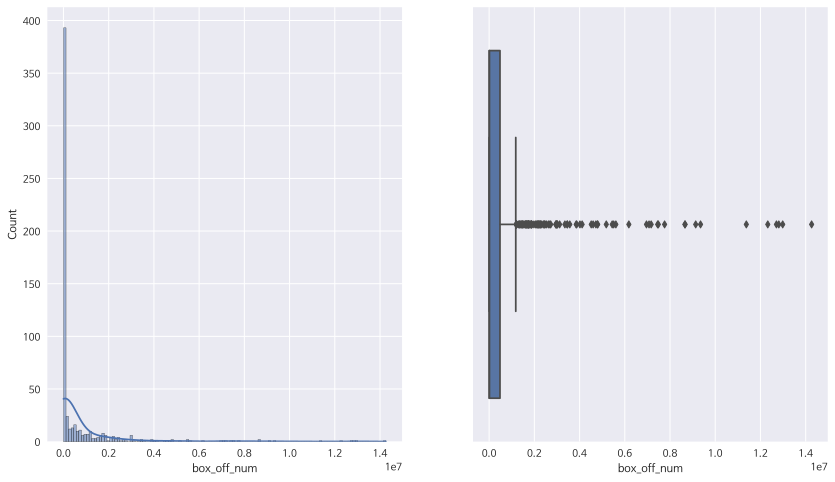

In [40]:
f, ax = plt.subplots(1,2, figsize=(14,8))
sns.histplot(data=train, x='box_off_num', kde=True, ax=ax[0])
sns.boxplot(data=train, x='box_off_num', ax=ax[1])
plt.show()

In [44]:
train.sample(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
533,홈 스위트 홈,머스트 씨 무비,애니메이션,2014-07-17,67,12세 관람가,안도 마사히로,NaN,0,8,3,2329
227,나를 닮은 얼굴,영화사 진진,다큐멘터리,2010-09-30,75,전체 관람가,태미 추,NaN,0,3,2,893
202,사랑해! 진영아,인디스토리,드라마,2013-11-07,102,15세 관람가,이성은,7.0,1,112,5,4941
16,써니,CJ E&M Pictures,코미디,2011-05-04,124,15세 관람가,강형철,8223342.0,1,572,11,7453715
256,태아 3D,(주)팝엔터테인먼트,다큐멘터리,2013-04-18,80,전체 관람가,표만석,NaN,0,15,2,712


In [43]:
train['distributor'].value_counts()

CJ 엔터테인먼트          54
롯데엔터테인먼트           52
(주)NEW             30
(주)마운틴픽쳐스          29
인디스토리              26
                   ..
전망좋은영화사             1
씨네굿필름               1
동국대학교 충무로영상제작센터     1
판다미디어               1
영희야놀자               1
Name: distributor, Length: 169, dtype: int64

In [45]:
train['genre'].value_counts()

드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: genre, dtype: int64

In [47]:
train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

# Feature Engineering

0       2.197802
1       0.775194
2       1.166181
3      30.000000
4       0.796813
         ...    
595     1.372549
596     2.097902
597     3.252033
598     0.928074
599     1.377410
Length: 600, dtype: float64

In [433]:
#스태프별 주연비율
train['actor_rat'] = train['num_actor'] / train["num_staff"].round() * 100
test['actor_rat'] = test['num_actor'] / test["num_staff"].round() * 100

train.loc[train['actor_rat'].isnull(), 'actor_rat'] = 0

In [381]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
actor_rat           0
dtype: int64

In [382]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
actor_rat           0
dtype: int64

In [313]:
# train['distributor'].unique()

In [314]:
# train['distributor'].nunique()

In [315]:
# #(주) 제거
# train['distributor'] = train['distributor'].str.replace('\\(',"").str.replace('주',"").str.replace("\\)","")
# test['distributor'] = test['distributor'].str.replace('\\(',"").str.replace('주',"").str.replace("\\)","")
# #공백 제거
# train['distributor'] = train['distributor'].str.replace(" ","")
# test['distributor'] = test['distributor'].str.replace(" ","")

In [316]:
# # distributor 중복제거
# distributor_names = train['distributor'].unique()
# distributor_names
# showbox = []
# CJ = []
# mountain = []
# for name in distributor_names:
#   if "쇼박스" in name:
#     showbox.append(name)
#   if "CJ" in name or "CGV" in name:
#     CJ.append(name)
#   if "마운틴" in name:
#     if "더픽쳐스/마운틴픽쳐스" == name:
#       continue
#     else:
#       mountain.append(name)
#   if "THE" in name:
#     train.loc[train['distributor'] == name, "distributor"] = "더픽쳐스"

# for name in showbox:
#   train.loc[train['distributor'] == name, "distributor"] = "쇼박스"

# for name in CJ:
#   train.loc[train['distributor'] == name, "distributor"] = "CJ"

# for name in mountain:
#   train.loc[train['distributor'] == name, "distributor"] = "마운틴"

In [317]:
# train['distributor'].nunique()

In [318]:
# train['distributor'].unique()

In [434]:
#year
train['year'] = train['release_time'].astype(np.datetime64).dt.year
test['year'] = test['release_time'].astype(np.datetime64).dt.year
#month
train['month'] = train['release_time'].astype(np.datetime64).dt.month
test['month'] = test['release_time'].astype(np.datetime64).dt.month

In [435]:
train.loc[(train['dir_prev_bfnum'].isnull()) & (train['dir_prev_num'] == 0), "dir_prev_bfnum"] = 0
test.loc[(test['dir_prev_bfnum'].isnull()) & (test['dir_prev_num'] == 0), "dir_prev_bfnum"] = 0

In [436]:
train.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
actor_rat         0
year              0
month             0
dtype: int64

In [386]:
 test.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
actor_rat         0
year              0
month             0
dtype: int64

In [437]:
#drop
drop_columns = ['title', 'release_time',"director","distributor"]
train = train.drop(drop_columns, axis=1)
test = test.drop(drop_columns, axis=1)

In [438]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,actor_rat,year,month
0,액션,96,청소년 관람불가,0.00,0,91,2,23398,2.197802,2012,11
1,느와르,130,청소년 관람불가,1161602.50,2,387,3,7072501,0.775194,2015,11
2,액션,123,15세 관람가,220775.25,4,343,4,6959083,1.166181,2013,6
3,코미디,101,전체 관람가,23894.00,2,20,6,217866,30.000000,2012,7
4,코미디,108,15세 관람가,1.00,1,251,2,483387,0.796813,2010,11


In [439]:
test.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,actor_rat,year,month
0,느와르,125,청소년 관람불가,3.005290e+05,2,304,3,0.986842,2010,1
1,멜로/로맨스,113,12세 관람가,3.427002e+05,4,275,3,1.090909,2010,1
2,드라마,115,12세 관람가,4.206611e+06,3,419,7,1.670644,2010,1
3,액션,116,15세 관람가,6.913420e+05,2,408,2,0.490196,2010,2
4,공포,110,15세 관람가,3.173800e+04,1,380,1,0.263158,2010,2


In [440]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

encoding_columns = ["genre","screening_rat"]
for column in encoding_columns:
  train[column] = label_encoder.fit_transform(train[column])
  test[column] = label_encoder.transform(test[column])

In [391]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,actor_rat,year,month
0,10,96,3,0.00,0,91,2,23398,2.2,2012,11
1,2,130,3,1161602.50,2,387,3,7072501,0.8,2015,11
2,10,123,1,220775.25,4,343,4,6959083,1.2,2013,6
3,11,101,2,23894.00,2,20,6,217866,30.0,2012,7
4,11,108,1,1.00,1,251,2,483387,0.8,2010,11


In [392]:
test.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,actor_rat,year,month
0,2,125,3,3.005290e+05,2,304,3,1.0,2010,1
1,5,113,0,3.427002e+05,4,275,3,1.1,2010,1
2,4,115,0,4.206611e+06,3,419,7,1.7,2010,1
3,10,116,1,6.913420e+05,2,408,2,0.5,2010,2
4,1,110,1,3.173800e+04,1,380,1,0.3,2010,2


In [393]:
train.dtypes

genre               int64
time                int64
screening_rat       int64
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
actor_rat         float64
year                int64
month               int64
dtype: object

0            0.0
1      1161602.0
2       220775.0
3        23894.0
4            1.0
         ...    
595       3833.0
596     496061.0
597          0.0
598          0.0
599          0.0
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [411]:
dfs = [train, test]
for df in dfs: 
  df['dir_prev_bfnum'] = np.round(df['dir_prev_bfnum'])
  df['dir_prev_bfnum'] = np.round(df['dir_prev_bfnum'])

In [412]:
train.head()

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,actor_rat,year,month
0,10,96,3,0.0,0,91,2,23398,2.2,2012,11
1,2,130,3,1161602.0,2,387,3,7072501,0.8,2015,11
2,10,123,1,220775.0,4,343,4,6959083,1.2,2013,6
3,11,101,2,23894.0,2,20,6,217866,30.0,2012,7
4,11,108,1,1.0,1,251,2,483387,0.8,2010,11


#모델

In [251]:
!pip install catboost

     |████████████████████████████████| 69.2MB 46kB/s 


In [441]:

from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import train_test_split

In [463]:
def rmse(y_true, y_pred):
  result = mse(y_true, y_pred)
  result = np.sqrt(result)
  return result

In [480]:
column = ['genre', 'time', 'screening_rat', 'dir_prev_bfnum', 'dir_prev_num','num_staff', 'num_actor', 'year', 'month']

X = train[column]
y = train['box_off_num']

X_test = test[column]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train : {} y_train : {}".format(X_train.shape, y_train.shape))
print("X_val : {} y_val : {}".format(X_val.shape, y_val.shape))
print("X_test : {}".format(X_test.shape))

X_train : (480, 9) y_train : (480,)
X_val : (120, 9) y_val : (120,)
X_test : (243, 9)


In [481]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer

In [466]:
models = [RandomForestRegressor(criterion='mse'), XGBRegressor(criterion='mse'), LGBMRegressor(objective='mse'), CatBoostRegressor(verbose=200)]

for model in models:
  print(model.__class__.__name__)
  model.fit(X_train, y_train)
  model_pred = model.predict(X_val)
  print("rmse" ,rmse(y_val, model_pred))

RandomForestRegressor
rmse 1378633.6864292237
XGBRegressor
[11:42:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse 1346661.1234122857
LGBMRegressor
rmse 1548465.3590515207
CatBoostRegressor
Learning rate set to 0.03425
0:	learn: 1908196.5792805	total: 989us	remaining: 989ms
200:	learn: 756444.5074167	total: 142ms	remaining: 564ms
400:	learn: 504533.3499086	total: 269ms	remaining: 402ms
600:	learn: 347557.7829011	total: 396ms	remaining: 263ms
800:	learn: 258834.5991714	total: 522ms	remaining: 130ms
999:	learn: 202836.0742574	total: 657ms	remaining: 0us
rmse 1595047.9662631156


In [483]:
from sklearn.model_selection import GridSearchCV
clf  = XGBRegressor()
params = {
    "learning_rate " : [0.01,0.05],
    "n_estimators " : [1000,2000]
}
grid_clf = GridSearchCV(estimator=clf, param_grid= params, n_jobs=-1, cv=5, scoring=make_scorer(rmse, greater_is_better=False))
grid_clf.fit(X,y)
print(grid_clf.best_score_)

[11:49:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1544781.1424696157


In [498]:
from sklearn.model_selection import GridSearchCV
clf  = RandomForestRegressor(criterion='mse')
params = {
    "random_state" : [42],
    "max_depth" : [4,5,6],
}
grid_clf = GridSearchCV(estimator=clf, param_grid= params, n_jobs=-1, cv=5, scoring=make_scorer(rmse, greater_is_better=False))
grid_clf.fit(X,y)
print(grid_clf.best_score_)

-1446022.9233185586


In [501]:
pred = grid_clf.predict(X_test)

# 제출

In [502]:
submission = pd.read_csv(path + "submission.csv")
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [503]:
submission['box_off_num'] = pred
submission.head()

,title,box_off_num
0,용서는 없다,2.547522e+06
1,아빠가 여자를 좋아해,9.604168e+05
2,하모니,1.376409e+06
3,의형제,1.270179e+06
4,평행 이론,1.067707e+06


In [504]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/movies/"
sub_name = "rf_submission1.csv"
submission.to_csv(sub_path + sub_name, index=False)